### Load the Dataset

In [1]:
# import the library to get the data
from tensorflow.keras.datasets import mnist
print('Imported')

Imported


In [2]:
# Data loading
(X_train_cnn, y_train_cnn), (X_test_cnn, y_test_cnn) = mnist.load_data()
print('Data Loaded')

Data Loaded


In [3]:
# taking a look
X_train_cnn

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train_cnn

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
# want see a particular image from the dataset
an_element = X_train_cnn[5160]
an_element

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,  55, 233,
        253, 255, 253, 222, 138,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

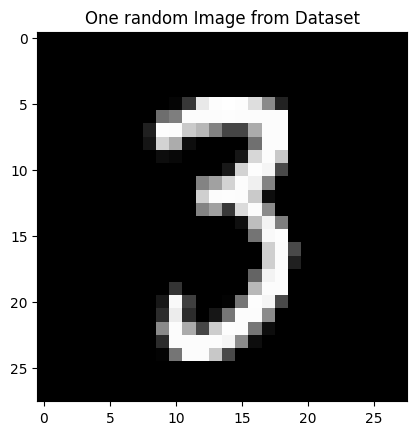

In [6]:
# plotting an image
import matplotlib.pyplot as plt
plt.imshow(an_element, cmap='gray')
plt.title('One random Image from Dataset')
plt.show()

### Preprocessing Data for Logistic Regression, we have to convert into X and Y matrix

In [9]:
# Converting 3D, matrix into 2D matrix, since Logistic Regression works with 2 Variables
X_train_LR = X_train_cnn.reshape(X_train_cnn.shape[0], -1)
X_test_LR = X_test_cnn.reshape(X_test_cnn.shape[0], -1)

# normalisation
# Preprocessing the data for Classication as we want pixel values between 0 and 1
X_train_LR = X_train_LR / 255.0
X_test_LR = X_test_LR / 255.0
print('Reduced Value in range of 0 and 1')

Reduced Value in range of 0 and 1


In [10]:
# One particular Image
X_train_LR[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Classification

In [11]:
#import the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
print('Imported')

Imported


In [12]:
# the model training using fit()
logistic_model = LogisticRegression(max_iter=5000)
LR_training_hist = logistic_model.fit(X_train_LR, y_train_cnn)
print('Trained')

Trained


In [13]:
# saving this model locally on this machine
import joblib

model_fileName = 'logisticRegressionModel.joblib'
joblib.dump(logistic_model, model_fileName)
print(f'Model saved as {model_fileName}')

Model saved as logisticRegressionModel.joblib


In [14]:
LR_training_hist

LogisticRegression(max_iter=5000)

### Predicting

In [16]:
# making prediction on test part of X
y_pred = logistic_model.predict(X_test_LR)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [17]:
# Evaluating metric for this model
log_acc = accuracy_score(y_test_cnn, y_pred)
log_pre = precision_score(y_test_cnn, y_pred, average='macro')
log_f1 = f1_score(y_test_cnn, y_pred, average='macro')
log_cm = confusion_matrix(y_test_cnn, y_pred)
print('Evaluated Metrics')

Evaluated Metrics


In [18]:
# printing the metrics
print(f'Accuracy Score {log_acc}')
print(f'Precision Score {log_pre}')
print(f'F1 Score {log_f1}')
print(f'Confusion Matrix\n {log_cm}')

Accuracy Score 0.9256
Precision Score 0.9246418911040273
F1 Score 0.9245145146579435
Confusion Matrix
 [[ 955    0    2    4    1   10    4    3    1    0]
 [   0 1110    5    2    0    2    3    2   11    0]
 [   6    9  930   14   10    3   12   10   34    4]
 [   4    1   16  925    1   23    2   10   19    9]
 [   1    3    7    3  921    0    6    5    6   30]
 [   9    2    3   35   10  777   15    6   31    4]
 [   8    3    8    2    6   16  912    2    1    0]
 [   1    7   23    7    6    1    0  947    4   32]
 [   9   11    6   22    7   29   13   10  855   12]
 [   9    8    1    9   21    7    0   21    9  924]]


## Convolutional Neural Network using TensorFlow

In [ ]:
# get the libraries
import tensorflow as tf
print('Imported')

In [21]:
# Reshape the data to add the channel dimension for grayscale images
X_train_cnn = X_train_cnn.reshape(X_train_cnn.shape[0],28, 28, 1)
X_test_cnn = X_test_cnn.reshape(X_test_cnn.shape[0], 28, 28, 1)

print('Data Reshaped')

Data Reshaped


In [22]:
X_train_cnn

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


### Model Building

In [23]:
# import library for model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
print('Imported')

Imported


In [24]:
# create an object of the model
cnn_model = Sequential()
print('Obj created')

Obj created


In [25]:
# Adding a layers of 32 filters
cnn_model.add(Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu', input_shape=(28,28,1)))
cnn_model.add(MaxPool2D(pool_size=2))
print('Layer added')

Layer added


In [26]:
# Adding a layer with 64 filters
cnn_model.add(Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=2))
print('Layer added')

Layer added


In [27]:
# Adding a layer with 128 filters
cnn_model.add(Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=2))
print('Layer added')

Layer added


In [28]:
# Flatten the input
cnn_model.add(Flatten())
print('Flattened')

Flattened


In [29]:
# add hidden dense layer
cnn_model.add(Dense(units=128, activation='relu'))
print('Added hidden Dense layer')

Added hidden Dense layer


In [30]:
# add the final output layer, neurons = 10, as their are 10 different classes to classify among
cnn_model.add(Dense(units=10, activation='softmax'))
print('Added Final Layer')

Added Final Layer


In [31]:
# # Blueprint of CNN model architecture
# cnn_model = Sequential([
#     Conv2D(),
#     MaxPool2D,
#     Conv2D(),
#     MaxPool2D(),
#     Flatten(),
#     Dense(),
#     Dense()
# ])

In [32]:
# compile
cnn_model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [33]:
# Model training
training_mnist_history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=3, validation_data=(X_test_cnn, y_test_cnn))
print('Model Trained')

Epoch 1/3
1875/1875 [==============================] - 331s 176ms/step - loss: 0.2847 - accuracy: 0.9337 - val_loss: 0.0816 - val_accuracy: 0.9762
Epoch 2/3
1875/1875 [==============================] - 329s 175ms/step - loss: 0.0844 - accuracy: 0.9744 - val_loss: 0.0901 - val_accuracy: 0.9734
Epoch 3/3
1875/1875 [==============================] - 323s 172ms/step - loss: 0.0660 - accuracy: 0.9804 - val_loss: 0.0764 - val_accuracy: 0.9778
Model Trained


In [39]:
# saving the model
cnn_model.save('CNN_mnist_model.keras')
print('Model Saved')

Model Saved


In [41]:
training_mnist_history.history

{'loss': [0.28465133905410767, 0.08441919088363647, 0.06600602716207504],
 'accuracy': [0.9337000250816345, 0.9744333624839783, 0.9803833365440369],
 'val_loss': [0.08163227885961533, 0.09006965905427933, 0.076435387134552],
 'val_accuracy': [0.9761999845504761, 0.9733999967575073, 0.9778000116348267]}

In [43]:
# Saving training history
import json

with open('training_history_mnist', 'w') as f:
    json.dump(training_mnist_history.history, f)
print('Saved training history in a file')

Saved training history in a file


In [44]:
# making Predictions
import numpy as np

cnn_predictions = cnn_model.predict(X_test_cnn)
y_pred_cnn = np.argmax(cnn_predictions, axis=1)
y_pred_cnn

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [45]:
# Evaluation
cnn_accuracy = accuracy_score(y_test_cnn, y_pred_cnn)
cnn_precision = precision_score(y_test_cnn, y_pred_cnn, average='macro')
cnn_f1 = f1_score(y_test_cnn, y_pred_cnn, average='macro')
cnn_confusion_matrix = confusion_matrix(y_test_cnn, y_pred_cnn)
print('Evaluated Matrix')

Evaluated Matrix


In [46]:
print("CNN Accuracy:", cnn_accuracy)
print("CNN Precision:", cnn_precision)
print("CNN F1 Score:", cnn_f1)
print("CNN Confusion Matrix:\n", cnn_confusion_matrix)

CNN Accuracy: 0.9778
CNN Precision: 0.9777268190707888
CNN F1 Score: 0.9775930744005393
CNN Confusion Matrix:
 [[ 973    0    3    0    2    1    0    1    0    0]
 [   0 1122    4    1    0    0    6    2    0    0]
 [   1    0 1022    2    1    0    0    6    0    0]
 [   0    0    3 1000    0    3    0    3    1    0]
 [   2    1    0    0  961    1    6    0    1   10]
 [   4    0    1    6    1  874    2    2    2    0]
 [  10    1    1    0    1   17  927    0    1    0]
 [   3    1   39    2    2    0    0  981    0    0]
 [   3    0    3    2    2    4    0    1  956    3]
 [   8    3    1    0    7   14    0    8    6  962]]


# Testing

In [49]:
# predicting class of a single image
single_img = X_test_cnn[250]
single_img_label = y_test_cnn[250]

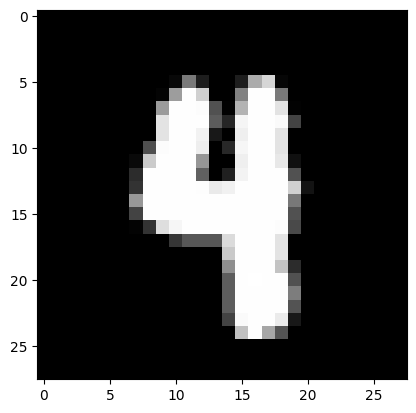

In [50]:
# seeing the image
import matplotlib.pyplot as plt
plt.imshow(single_img, cmap='gray')
plt.show()

In [51]:
# checking if the label is same
y_test_cnn[250]

4

In [ ]:
#loading the model
loaded_model = tf.keras.load_model('CNN_mnist_model.keras')

In [ ]:
single_prediction = cnn_model.predict(single_img)
single_prediction